In [1]:
# Setting seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import pandas as pd
import json
import os
import pickle # for saving and loading trained model
from os import path
from zipfile import ZipFile


#for prediction score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.math import confusion_matrix

# for deep learning model
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input, BatchNormalization
from keras.models import Model
# representation of model layers

# Getting data from kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d hassan06/nslkdd/

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd/versions/
License(s): unknown
 65% 9.00M/13.9M [00:00<00:00, 72.1MB/s]
100% 13.9M/13.9M [00:00<00:00, 94.7MB/s]


In [7]:
!ls

kaggle.json  nslkdd.zip  sample_data


In [8]:
with ZipFile("nslkdd.zip",'r') as zip:
  zip.extractall()

In [9]:
!ls


index.html    KDDTest-21.arff  KDDTest+.txt		 KDDTrain+_20Percent.txt  nsl-kdd
kaggle.json   KDDTest-21.txt   KDDTrain1.jpg		 KDDTrain+.arff		  nslkdd.zip
KDDTest1.jpg  KDDTest+.arff    KDDTrain+_20Percent.arff  KDDTrain+.txt		  sample_data


# B. DATA PREPROCESSING


In [10]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [11]:
train_data=pd.read_csv("KDDTrain+.txt",names=feature)

In [12]:
test_data=pd.read_csv("KDDTest+.txt",names=feature)
test_data_21=pd.read_csv("KDDTest-21.txt",names=feature)

In [13]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [14]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [16]:
#checking for null values
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### B.1 Numericalization
There are 38 numeric features and 3 nonnumeric features in the NSL-KDD dataset. Because the input value of
RNN-IDS should be a numeric matrix, we must convert some
nonnumeric features, such as ‘protocol_type’, ‘service’ and
‘flag’ features, into numeric form.
* *Here i have not used the method adviced in the paper as it was creating a lot of useless features which might increase traning time*

In [18]:
train_data.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [19]:
def label(row):
    if row['label'] == 'normal':
        return 'normal'
    elif row['label'] in ['port-Sweep', 'ip-Sweep', 'nmap', 'satan', 'saint', 'mscan']:
        return 'Probing'
    elif row['label'] in ['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back', 'apache2',
                           'udpstorm', 'processtable', ',mail-Bomb']:
        return 'Dos'
    elif row['label'] in ['buffer-Overflow', 'load-Module', 'perl', 'rootkit', 'xterm',
                           'ps', 'sqlattack']:
        return 'U2R'
    else:
        return 'R2L'

In [20]:
train_data['label'] = train_data.apply(label,axis=1)
test_data['label'] = test_data.apply(label,axis=1)

<Axes: xlabel='count', ylabel='label'>

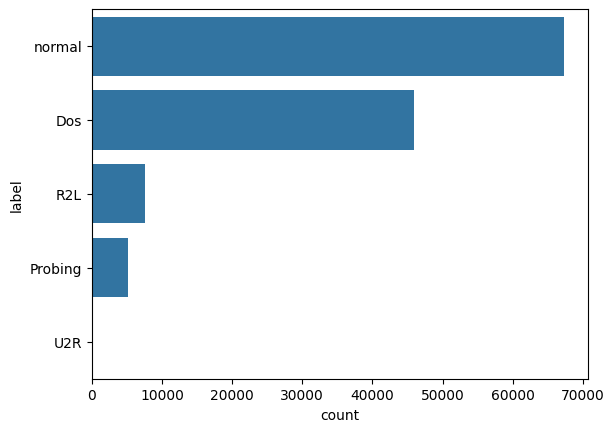

In [21]:
sns.countplot(train_data['label'])

<Axes: xlabel='count', ylabel='label'>

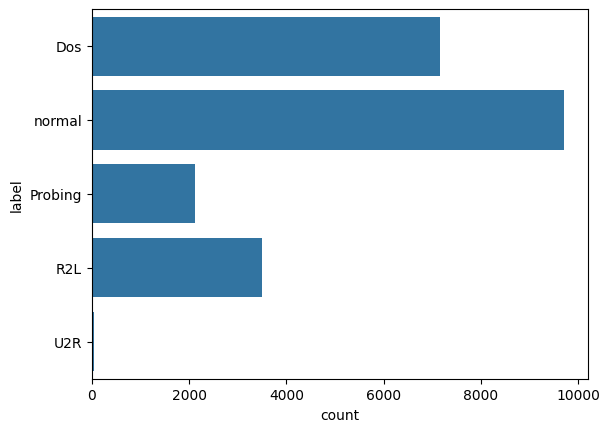

In [22]:
sns.countplot(test_data['label'])

In [23]:
#getting the features name whos value in not a real number
ob=train_data.select_dtypes(['object']).columns
ob

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')

In [24]:
test_data.protocol_type.unique()
# test_data.service.unique()
# test_data.flag.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
protocol_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()


In [26]:
# # ! bad results so trying different way
protocol_le.fit(train_data['protocol_type'])
service_le.fit(train_data['service'])
flag_le.fit(train_data['flag'])

# Trasform the training data
train_data['protocol_type'] = protocol_le.transform(train_data['protocol_type'])
train_data['service'] = service_le.transform(train_data['service'])
train_data['flag'] = flag_le.transform(train_data['flag'])

# Transform the test data
test_data['protocol_type'] = protocol_le.transform(test_data['protocol_type'])
test_data['service'] = service_le.transform(test_data['service'])
test_data['flag'] = flag_le.transform(test_data['flag'])

In [27]:
train_data.protocol_type.unique()

array([1, 2, 0])

In [28]:

# Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.
train_data = pd.get_dummies(train_data, columns=['label'])
test_data= pd.get_dummies(test_data, columns=['label'])

<Axes: >

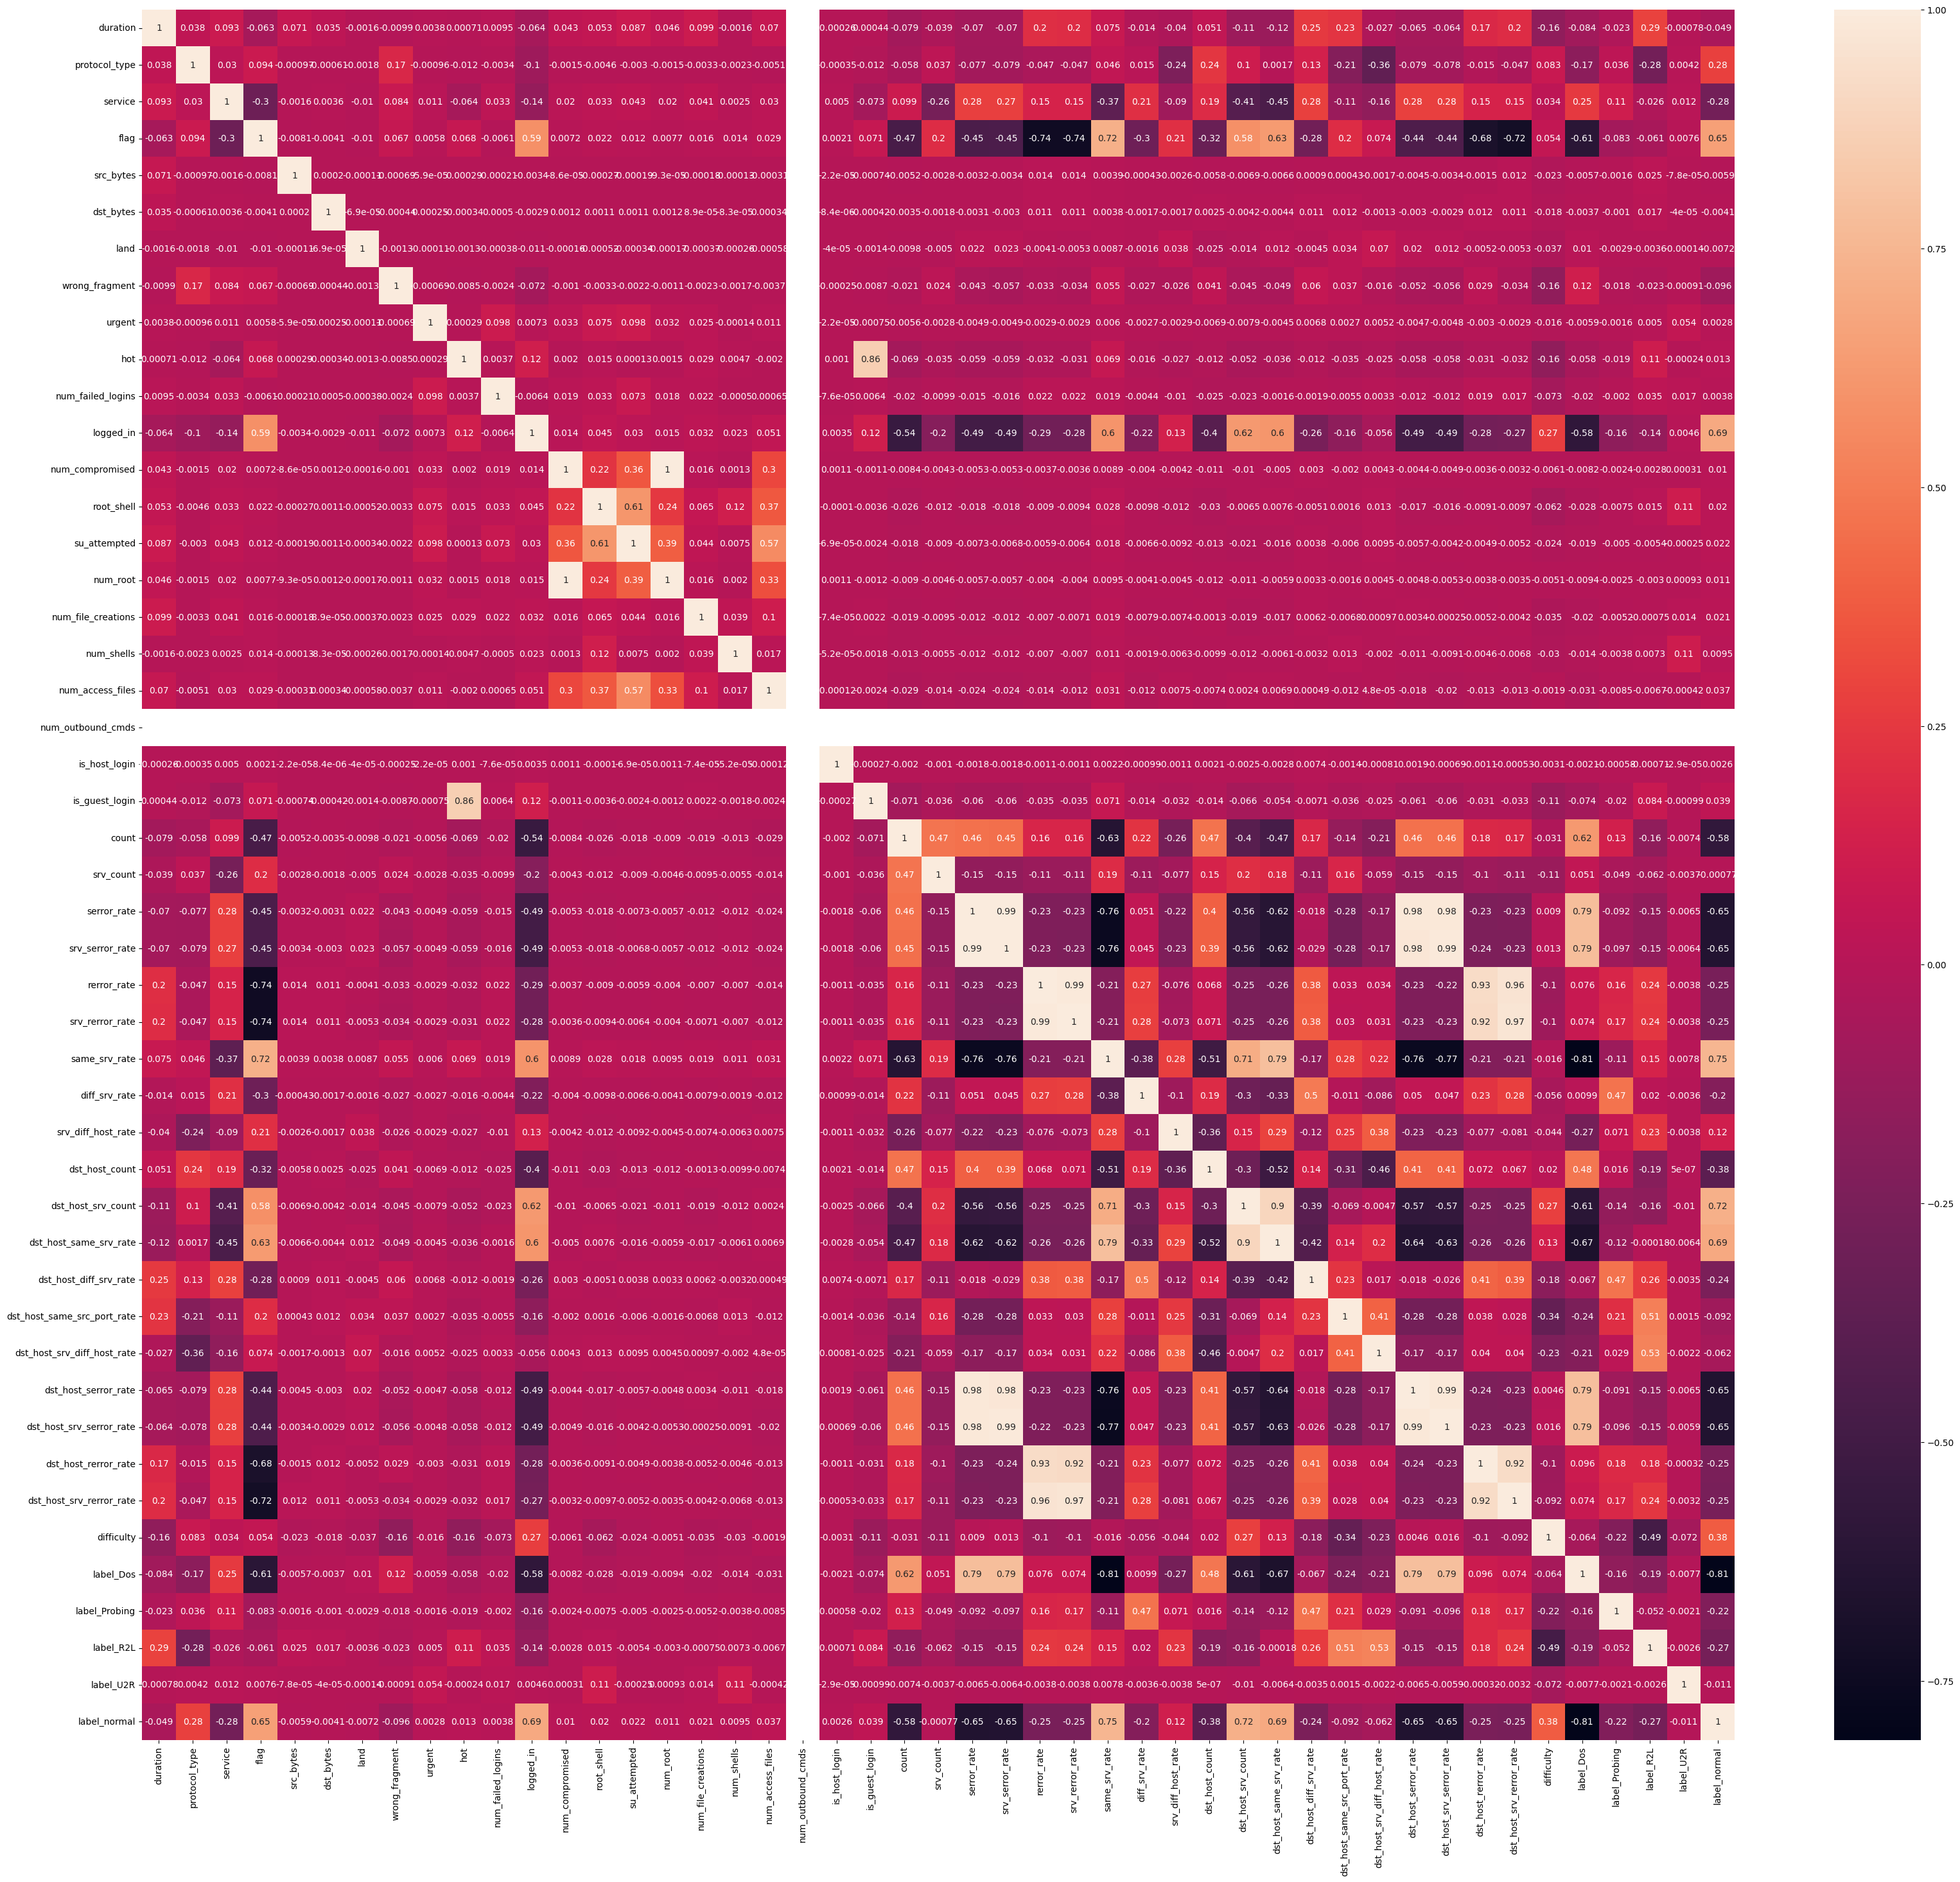

In [29]:
plt.figure(figsize=(40,35))
sns.heatmap(train_data.corr(),annot=True)

In [30]:
#removing useless labels
train_data.drop('num_outbound_cmds',axis=1,inplace=True)
test_data.drop('num_outbound_cmds',axis=1,inplace=True)
train_data.drop('difficulty',axis=1,inplace=True)
test_data.drop('difficulty',axis=1,inplace=True)

<Axes: >

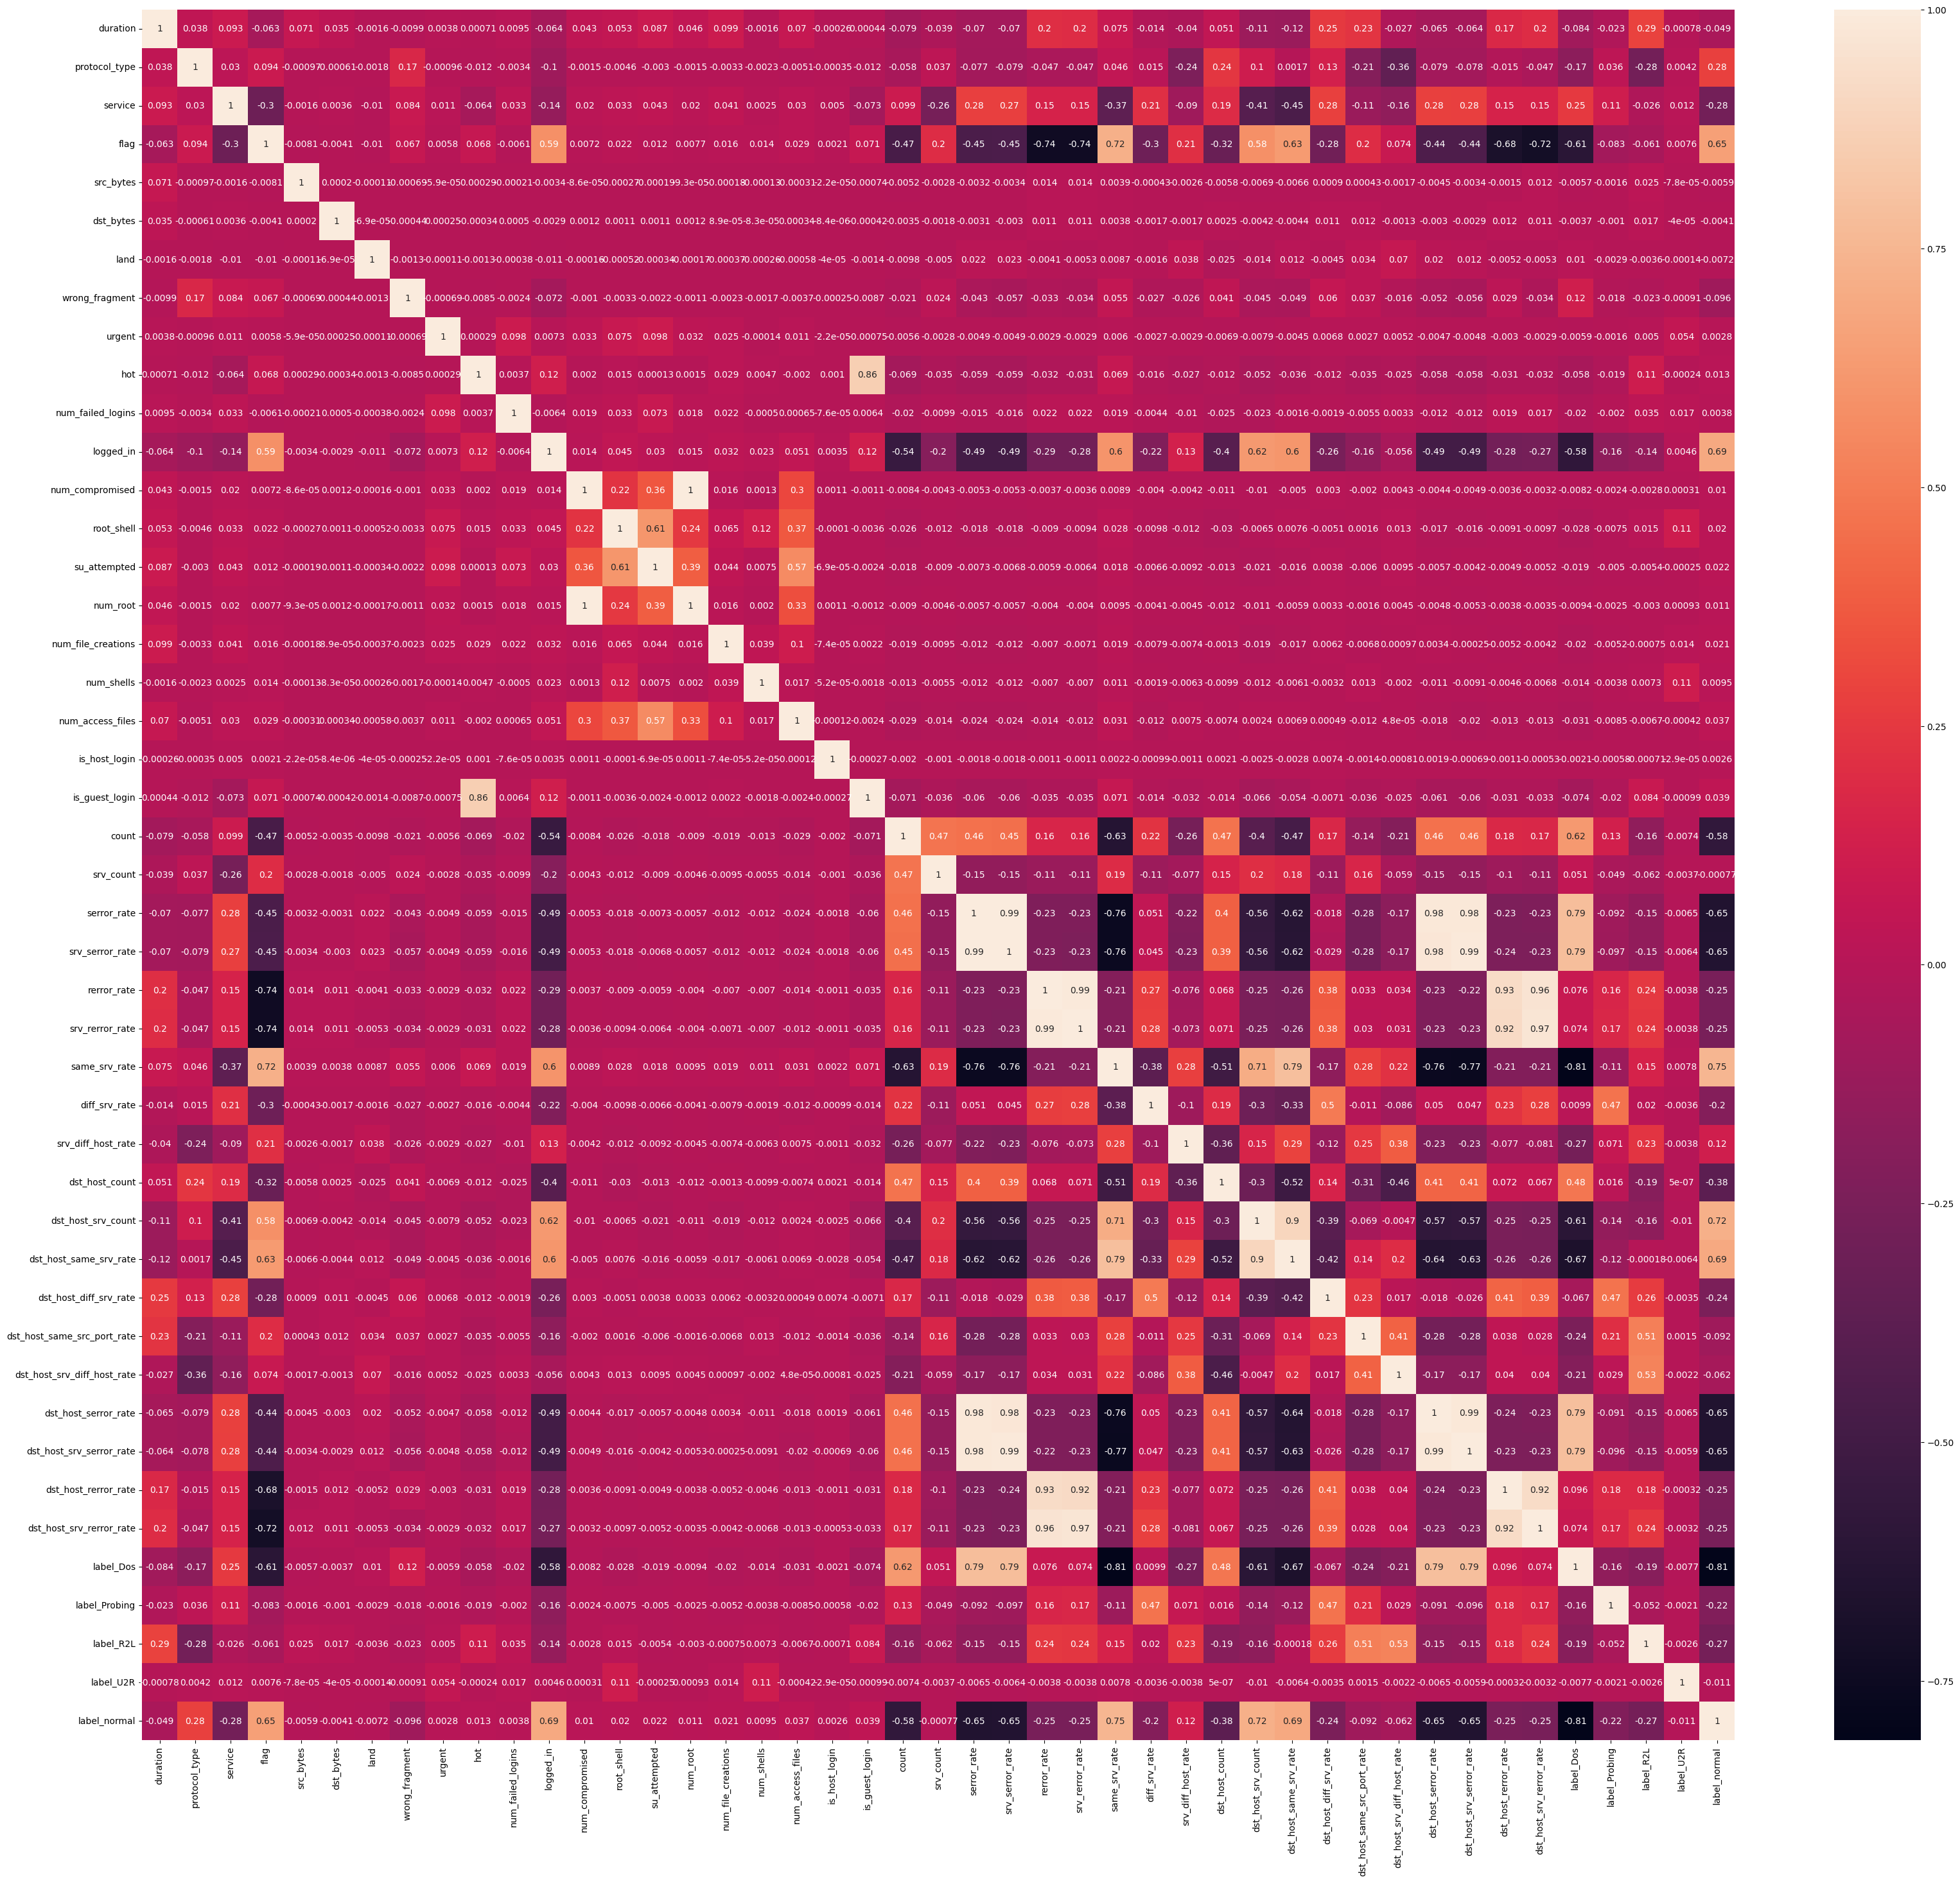

In [31]:
plt.figure(figsize=(40,35))
sns.heatmap(train_data.corr(),annot=True)

In [32]:
print(train_data.shape)


(125973, 45)


In [33]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_Dos,label_Probing,label_R2L,label_U2R,label_normal
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,False,False,False,False,True
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
2,0,1,49,5,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
3,0,1,24,9,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,False,False,False,False,True
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False
125969,8,2,49,9,105,145,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,False,False,False,False,True
125970,0,1,54,9,2231,384,0,0,0,0,...,0.00,0.72,0.00,0.01,0.00,False,False,False,False,True
125971,0,1,30,5,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,True,False,False,False,False


In [34]:
imp_features = train_data.columns.drop(['label_normal','label_U2R','label_R2L','label_Probing','label_Dos'])
imp_features

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [35]:
x_train = train_data[imp_features].values
# x_train = train_data.drop(['label_normal','label_U2R','label_R2L','label_Probing','label_Dos'],axis=1)
y_train = train_data[['label_normal','label_U2R','label_R2L','label_Probing','label_Dos']]

In [36]:
x_train.shape
# y_train.shape

(125973, 40)

In [37]:
x_test = test_data[imp_features].values
# x_test = test_data.drop(['label_normal','label_U2R','label_R2L','label_Probing','label_Dos'
y_test = test_data[['label_normal','label_U2R','label_R2L','label_Probing','label_Dos']]

In [38]:
x_test.shape
# x_test.shape has 115 features while x_test has 121 so i will try to add dummy columns to x_test which are missing

(22544, 40)

### B.2 NORMALIZATION
*Applying min-max scaler*

In [39]:
# from sklearn.preprocessing import RobustScaler
mm_scaller = MinMaxScaler()
x_train = mm_scaller.fit_transform(x_train)
x_test = mm_scaller.fit_transform(x_test)

In [40]:
x_train

array([[0.        , 0.5       , 0.28985507, ..., 0.        , 0.05      ,
        0.        ],
       [0.        , 1.        , 0.63768116, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.71014493, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.7826087 , ..., 0.        , 0.01      ,
        0.        ],
       [0.        , 0.5       , 0.43478261, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.28985507, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
#The input shape for an LSTM layer is a 3D tensor with the following dimensions:
#(batch_size, timesteps, input_features)
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# TRANNING THE MODEL

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape =  (1,x_train.shape[2]),kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=50,activation='relu'))
#output layer
model.add(Dense(units=5,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             26880     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [51]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)

history = model.fit(
    x_train,
    y_train,
    epochs=60,
   batch_size=500,
    validation_split=0.2,
    #  callbacks=[early_stopping, reduce_lr]
  )

Epoch 1/60
202/202 [==============================] - 11s 52ms/step - loss: 0.0564 - accuracy: 0.9845 - precision: 0.9852 - recall: 0.9837 - val_loss: 0.0442 - val_accuracy: 0.9909 - val_precision: 0.9913 - val_recall: 0.9903
Epoch 2/60
202/202 [==============================] - 12s 57ms/step - loss: 0.0550 - accuracy: 0.9853 - precision: 0.9860 - recall: 0.9846 - val_loss: 0.0442 - val_accuracy: 0.9902 - val_precision: 0.9907 - val_recall: 0.9891
Epoch 3/60
202/202 [==============================] - 9s 45ms/step - loss: 0.0567 - accuracy: 0.9842 - precision: 0.9849 - recall: 0.9835 - val_loss: 0.0432 - val_accuracy: 0.9911 - val_precision: 0.9917 - val_recall: 0.9906
Epoch 4/60
202/202 [==============================] - 7s 36ms/step - loss: 0.0563 - accuracy: 0.9848 - precision: 0.9855 - recall: 0.9841 - val_loss: 0.0437 - val_accuracy: 0.9906 - val_precision: 0.9911 - val_recall: 0.9901
Epoch 5/60
202/202 [==============================] - 5s 25ms/step - loss: 0.0537 - accuracy: 0.98

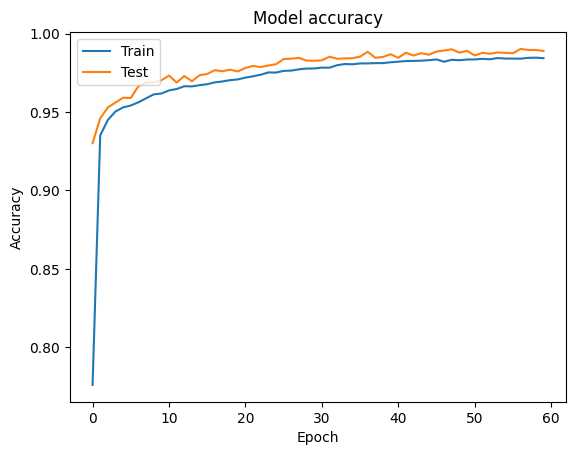

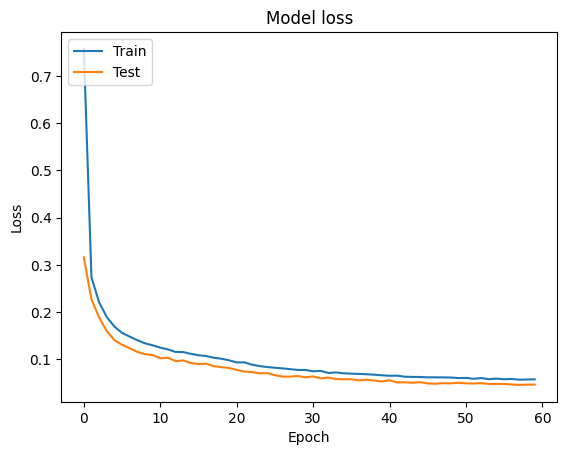

In [46]:
# Ploting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Ploting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
x_test = x_test.astype(float)
y_test = y_test.astype(float)

In [52]:
# predicting target attribute on testing dataset
test_results = model.evaluate(x_test, y_test,verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

705/705 [==============================] - 3s 5ms/step - loss: 1.8007 - accuracy: 0.7618 - precision: 0.7634 - recall: 0.7606
Test results - Loss: 1.8007349967956543 - Accuracy: 76.18435025215149%


In [53]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

705/705 [==============================] - 3s 4ms/step
tf.Tensor(
[[9470    0   89   90   62]
 [  41    0    4    0    0]
 [2916    0  532   33   19]
 [ 364    0  345 1006  408]
 [ 960    0   17   21 6167]], shape=(5, 5), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted lable')

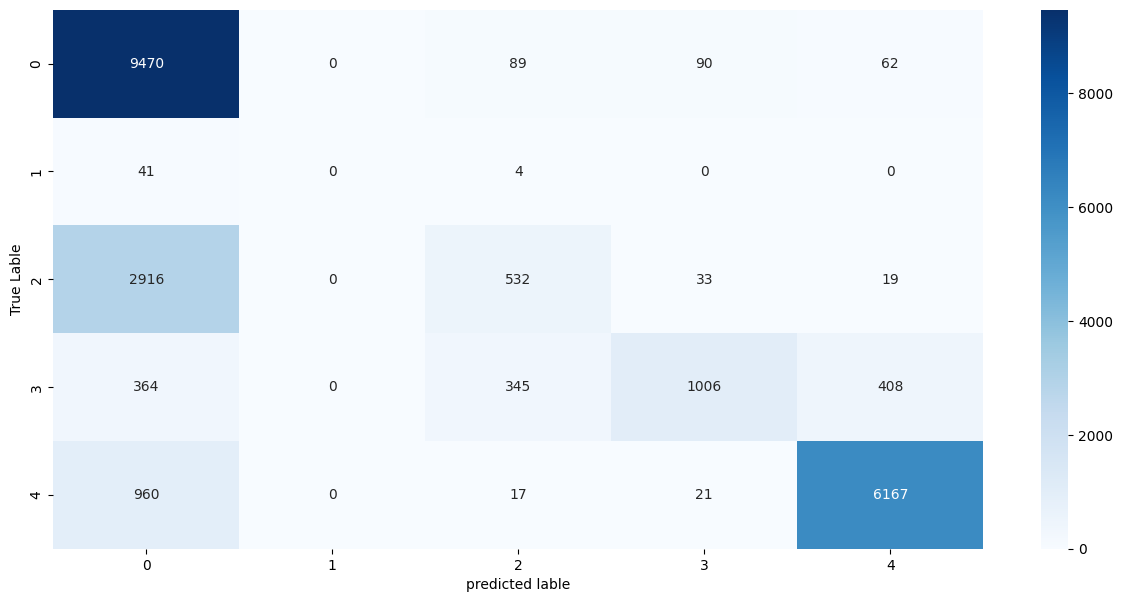

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')
plt.ylabel('True Lable')
plt.xlabel('predicted lable')